<a href="https://colab.research.google.com/github/sebavassou/estatistica_descritiva/blob/main/Trabalho_Final/Projeto_ED001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Incicialmente foi selecionada uma variável contínua no caso o valor do IDEB 2023 em relação aos Municípios. Vamos calcular todas as medidas de dispersão apresentadas (variância e desvios amostrais, bem como amplitude, intervalo interquartílico, coeficiente de dispersão quartílica e coeficiente de variação).

Este trabalho é realizado a partir do código em Python contido no presente caderno Colab.

 O código analisa o Índice de Desenvolvimento da Educação Básica (IDEB) de 2023 para os municípios brasileiros. Inicialmente, calcula medidas de dispersão como variância, desvio padrão e amplitude, buscando entender a concentração ou dispersão dos dados. Em seguida, o script visualiza a distribuição do IDEB através de histogramas e gráficos de densidade (KDE), identificando o intervalo interquartílico, a média e o desvio padrão.

 Adicionalmente, são calculadas e interpretadas a assimetria e a curtose da distribuição. Por fim, o código compara o IDEB entre diferentes tipos de rede de ensino, utilizando gráficos de dispersão e séries históricas.

In [4]:
#Bibliotecas recomendadas
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
#Conectando ao Google Drive
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/MyDrive/'

Mounted at /content/drive


In [6]:
#Fazendo a leitura do dataset
import requests

pasta = '/content/drive/MyDrive/Enap'
arquivo = 'ideb_municipios_2023.xlsx'
# Updated link to download raw file
link = 'https://raw.githubusercontent.com/sebavassou/estatistica_descritiva/main/dados/ideb_municipios_edit_2023.xlsx'


r = requests.get(link, stream = True)

with open(f"{pasta}/{arquivo}", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
         if block:
             file.write(block)

In [7]:
df = pd.read_excel(f"{pasta}/{arquivo}", skipfooter=14, skiprows=9)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              11721 non-null  object
 1   CO_MUNICIPIO       11721 non-null  int64 
 2   NO_MUNICIPIO       11721 non-null  object
 3   REDE               11721 non-null  object
 4   VL_OBSERVADO_2017  11721 non-null  object
 5   VL_OBSERVADO_2019  11721 non-null  object
 6   VL_OBSERVADO_2021  11721 non-null  object
 7   VL_OBSERVADO_2023  11721 non-null  object
dtypes: int64(1), object(7)
memory usage: 732.7+ KB


In [9]:
# Renomear as colunas
df = df.rename(columns={
    'SG_UF': 'UF',
    'NO_MUNICIPIO': 'MUNICIPIO',
    'VL_OBSERVADO_2017': 'IDEB_2017',
    'VL_OBSERVADO_2019': 'IDEB_2019',
    'VL_OBSERVADO_2021': 'IDEB_2021',
    'VL_OBSERVADO_2023': 'IDEB_2023'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UF            11721 non-null  object
 1   CO_MUNICIPIO  11721 non-null  int64 
 2   MUNICIPIO     11721 non-null  object
 3   REDE          11721 non-null  object
 4   IDEB_2017     11721 non-null  object
 5   IDEB_2019     11721 non-null  object
 6   IDEB_2021     11721 non-null  object
 7   IDEB_2023     11721 non-null  object
dtypes: int64(1), object(7)
memory usage: 732.7+ KB


In [10]:

# Converter as colunas IDEB para numérico, tratando erros
df['IDEB_2017'] = pd.to_numeric(df['IDEB_2017'], errors='coerce')
df['IDEB_2019'] = pd.to_numeric(df['IDEB_2019'], errors='coerce')
df['IDEB_2021'] = pd.to_numeric(df['IDEB_2021'], errors='coerce')
df['IDEB_2023'] = pd.to_numeric(df['IDEB_2023'], errors='coerce')

# Exibir informações sobre o DataFrame atualizado
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UF            11721 non-null  object 
 1   CO_MUNICIPIO  11721 non-null  int64  
 2   MUNICIPIO     11721 non-null  object 
 3   REDE          11721 non-null  object 
 4   IDEB_2017     10914 non-null  float64
 5   IDEB_2019     9742 non-null   float64
 6   IDEB_2021     6826 non-null   float64
 7   IDEB_2023     10314 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 732.7+ KB


# HISTOGRAMA

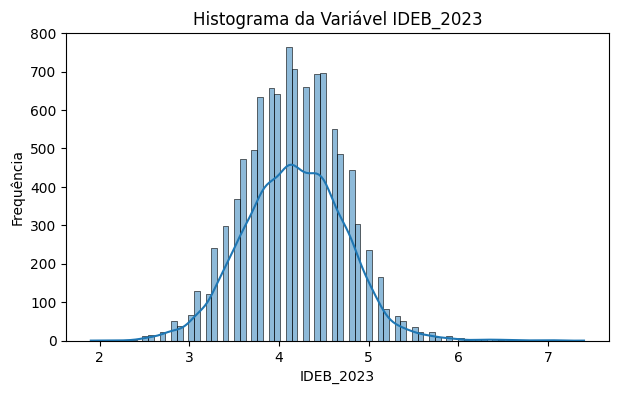

In [11]:
# Plota o histograma da variável IDEB_2023
plt.figure(figsize=(7, 4))
sns.histplot(df['IDEB_2023'], kde=True)
plt.title('Histograma da Variável IDEB_2023')
plt.xlabel('IDEB_2023')
plt.ylabel('Frequência')
plt.show()



In [12]:

# Calcular medidas de dispersão para a variável IDEB_2023

# Variância amostral
variance = df['IDEB_2023'].var()

# Desvio padrão amostral
std_dev = df['IDEB_2023'].std()

# Amplitude
amplitude = df['IDEB_2023'].max() - df['IDEB_2023'].min()

# Intervalo interquartílico (IIQ)
q1 = df['IDEB_2023'].quantile(0.25)
q3 = df['IDEB_2023'].quantile(0.75)
iqr = q3 - q1

# Coeficiente de dispersão quartílica
coefficient_quartile_dispersion = iqr / (q1 + q3)

# Coeficiente de variação
coefficient_variation = (std_dev / df['IDEB_2023'].mean()) * 100


print(f"Variância amostral: {variance}")
print(f"Desvio padrão amostral: {std_dev}")
print(f"Amplitude: {amplitude}")
print(f"Intervalo interquartílico (IIQ): {iqr}")
print(f"Coeficiente de dispersão quartílica: {coefficient_quartile_dispersion}")
print(f"Coeficiente de variação: {coefficient_variation}")


Variância amostral: 0.3175981110609499
Desvio padrão amostral: 0.5635584362432612
Amplitude: 5.5
Intervalo interquartílico (IIQ): 0.7000000000000002
Coeficiente de dispersão quartílica: 0.08433734939759037
Coeficiente de variação: 13.516910170254862


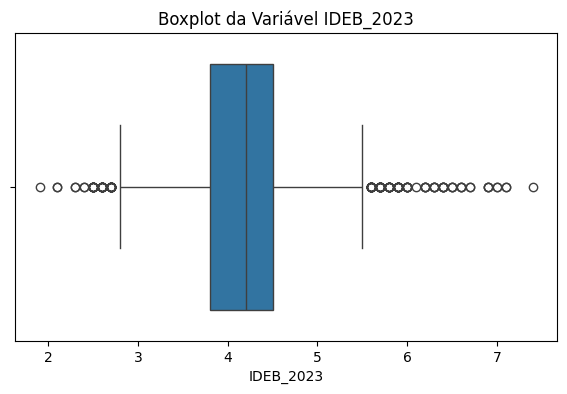

In [13]:
# Boxplot com intervalo interquartil
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['IDEB_2023'])
plt.title('Boxplot da Variável IDEB_2023')
plt.xlabel('IDEB_2023')
plt.show()


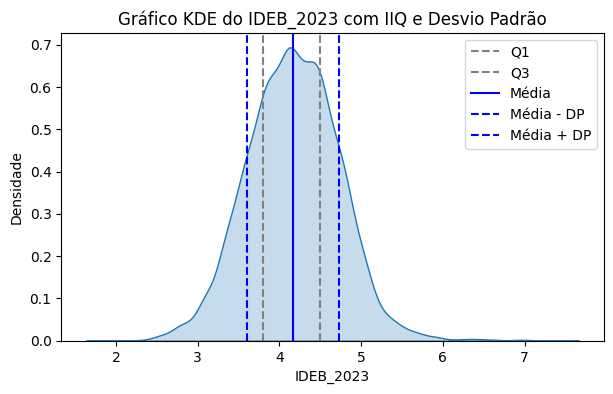

In [14]:

#Plot
#Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula os quartis
q1 = df['IDEB_2023'].quantile(0.25)
q3 = df['IDEB_2023'].quantile(0.75)

# Calcula a média e o desvio padrão
media = df['IDEB_2023'].mean()
desvio_padrao = df['IDEB_2023'].std()

# Cria o gráfico KDE
plt.figure(figsize=(7, 4))
sns.kdeplot(df['IDEB_2023'], fill=True)

# Adiciona linhas verticais para Q1 e Q3 (cinza)
plt.axvline(x=q1, color='gray', linestyle='--', label='Q1')
plt.axvline(x=q3, color='gray', linestyle='--', label='Q3')


# Adiciona linhas verticais para a média e o desvio padrão (azul)
plt.axvline(x=media, color='blue', linestyle='-', label='Média')
plt.axvline(x=media - desvio_padrao, color='blue', linestyle='--', label='Média - DP')
plt.axvline(x=media + desvio_padrao, color='blue', linestyle='--', label='Média + DP')


plt.title('Gráfico KDE do IDEB_2023 com IIQ e Desvio Padrão')
plt.xlabel('IDEB_2023')
plt.ylabel('Densidade')
plt.legend()
plt.show()


In [15]:
# Calcula a assimetria (skewness)
skewness = df['IDEB_2023'].skew()

# Calcula a curtose (kurtosis)
kurtosis = df['IDEB_2023'].kurt()

print(f"Assimetria (Skewness): {skewness}")
print(f"Curtose (Kurtosis): {kurtosis}")

# Interpretação da assimetria:
# Se skewness > 0: distribuição assimétrica positiva (cauda à direita)
# Se skewness < 0: distribuição assimétrica negativa (cauda à esquerda)
# Se skewness ≈ 0: distribuição simétrica

# Interpretação da curtose:
# Se kurtosis ≈ 3: distribuição mesocúrtica (semelhante à normal)
# Se kurtosis > 3: distribuição leptocúrtica (mais concentrada, caudas pesadas)
# Se kurtosis < 3: distribuição platicúrtica (menos concentrada, caudas leves)


Assimetria (Skewness): 0.17688872794080926
Curtose (Kurtosis): 0.7952611850844771


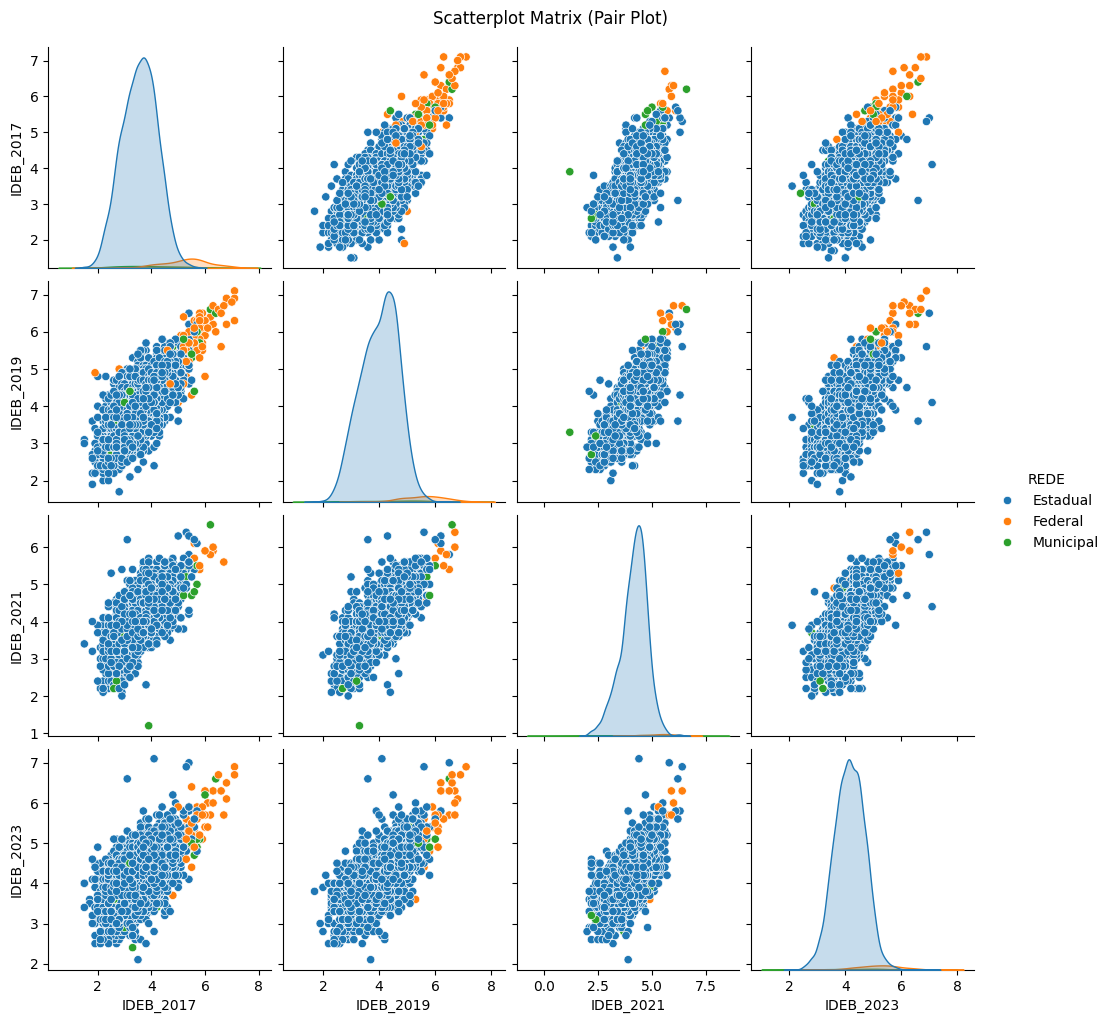

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filtra o DataFrame removendo a REDE == 'Pública'
df_filtrado = df[df['REDE'] != 'Pública']

# Remove a coluna CO_MUNICIPIO
df_filtrado = df_filtrado.drop(columns=['CO_MUNICIPIO'])

# Gera o pair plot, colorindo pelas tipo de REDE
sns.pairplot(df_filtrado, hue="REDE")
plt.suptitle("Scatterplot Matrix (Pair Plot)", y=1.02)
plt.show()


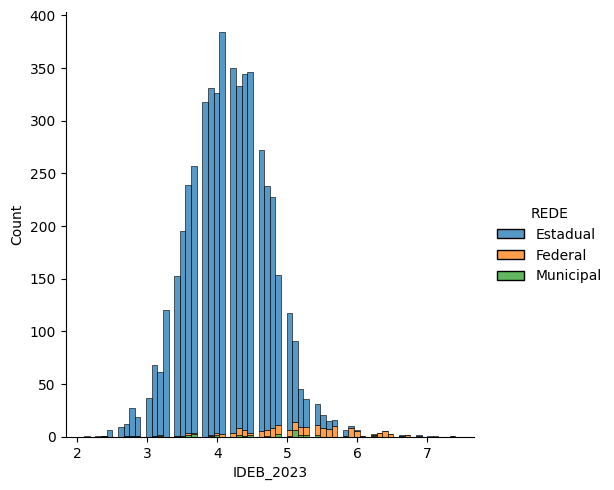

In [17]:
sns.displot(data=df_filtrado, x="IDEB_2023", hue="REDE", kind="hist", multiple="stack")


##Calculo da Serie Histórica por rede

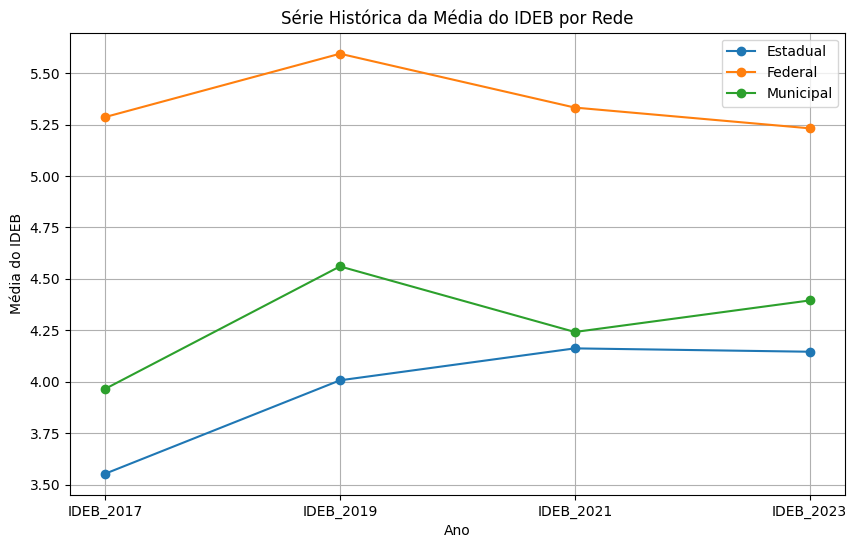

In [18]:
import matplotlib.pyplot as plt
# Calcula a média do IDEB para cada ano e rede
ideb_means = df_filtrado.groupby('REDE')[['IDEB_2017', 'IDEB_2019', 'IDEB_2021', 'IDEB_2023']].mean()

# Plota a série histórica do IDEB para cada rede
plt.figure(figsize=(10, 6))
for rede in ideb_means.index:
    plt.plot(ideb_means.columns, ideb_means.loc[rede], marker='o', label=rede)

plt.title('Série Histórica da Média do IDEB por Rede')
plt.xlabel('Ano')
plt.ylabel('Média do IDEB')
plt.legend()
plt.grid(True)
plt.show()


1. Análise das Medidas de Dispersão do IDEB 2023
•	Variância Amostral: 0.318
•	Desvio Padrão Amostral: 0.564
•	Amplitude: 5.5
•	Intervalo Interquartílico (IIQ): 0.7
•	Coeficiente de Dispersão Quartílica: 0.084
•	Coeficiente de Variação: 13.52%
1.1. Concentração da amostra
Para responder a essa pergunta, podemos analisar o desvio padrão e o coeficiente de variação.
•	Desvio Padrão: Um desvio padrão de 0.564 indica que os valores do IDEB_2023 tendem a se desviar da média em cerca de 0.564 pontos. Este valor, por si só, não nos diz se a amostra é muito concentrada ou dispersa. Precisamos considerar a escala da variável.
•	Coeficiente de Variação: Um coeficiente de variação de 13.52% significa que o desvio padrão representa 13.52% da média. Em geral, um coeficiente de variação abaixo de 30% indica uma dispersão relativamente baixa.
o	Interpretação: A amostra apresenta uma dispersão moderada, indicando que os valores do IDEB_2023 não estão excessivamente espalhados em torno da média.
1.2. A Amplitude Interna (IIQ) x Amplitude Total da Amostra
•	Amplitude: 5.5
•	IIQ: 0.7
A amplitude total é muito maior que o intervalo interquartílico.
•	Interpretação: O IIQ representa apenas uma pequena parte da amplitude total. Isso sugere que há valores extremos (outliers) na amostra que estão puxando a amplitude para cima, enquanto a maior parte dos dados está concentrada em um intervalo menor (o IIQ).
1.3. Quais as Implicações Dessas Informações em Relação ao Contexto/Significado Concreto Dessa Variável?
•	A dispersão moderada indica que, de modo geral, os municípios têm desempenhos relativamente similares no IDEB.
•	A amplitude total ser muito maior que o IIQ, indica que existem alguns municípios com valores de IDEB muito acima ou muito abaixo da média.
o	Implicações: Essa informação pode ser valiosa para identificar os municípios de destaque (com IDEB muito alto) e aqueles que necessitam de maior atenção (com IDEB muito baixo). Investigar as características desses municípios pode fornecer insights sobre fatores que influenciam o desempenho educacional.
2. Gráfico de Dispersão (KDE) da Variável Estudada
O gráfico KDE gerado mostra a distribuição da densidade do IDEB_2023. Ele permite visualizar a forma geral da distribuição, identificar picos (modas) e observar a presença de assimetria.

3. Componentes do IIQ e Desvio Padrão no Gráfico KDE
Plotou-se o gráfico KDE com as linhas verticais indicando Q1, Q3, média e desvio padrão.

4. Gráfico KDE Marcando Outliers
Para identificar outliers, uma abordagem comum é usar o critério do IIQ:
•	Limite Inferior: Q1 - 1.5 * IIQ
•	Limite Superior: Q3 + 1.5 * IIQ
Qualquer valor abaixo do limite inferior ou acima do limite superior é considerado um outlier.










#PARTE 2

A segunda parte do presente trabalho consiste em fazer uma analise multivariavel. Para isso carregaremos dois datasets referentes ao IDEB nacional e IDHM nacional.

Faremos um merged para criar um unico dataframe e realizaremos a nalise das correlações entre os dados considerando as duas variáveis.







In [19]:
# Carrega os dados do IDHM a partir do arquivo Excel
# Updated link to download raw file
idhm_df = pd.read_excel("https://raw.githubusercontent.com/sebavassou/estatistica_descritiva/main/dados/base_de_dados%20idhm_brasil_edit.xlsx", sheet_name='Base de Dados')


# Seleciona apenas as colunas relevantes para a análise
idhm_df = idhm_df[['ANO', 'IDHM', 'IDHM_L', 'IDHM_E', 'IDHM_R']]


# Exibe as primeiras linhas do DataFrame do IDHM com as colunas selecionadas e renomeadas
print(idhm_df.head())

# Verifique novamente os tipos de dados e valores ausentes
print(idhm_df.info())


    ANO   IDHM  IDHM_L  IDHM_E  IDHM_R
0  2012  0.746   0.825   0.687   0.732
1  2013  0.753   0.830   0.698   0.737
2  2014  0.762   0.835   0.715   0.741
3  2015  0.765   0.840   0.724   0.736
4  2016  0.771   0.845   0.740   0.734
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANO     10 non-null     int64  
 1   IDHM    10 non-null     float64
 2   IDHM_L  10 non-null     float64
 3   IDHM_E  10 non-null     float64
 4   IDHM_R  10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 532.0 bytes
None


In [20]:
# Carrega os dados do IDEB_Brasil a partir do arquivo Excel
# Updated link to download raw file
ideb_df = pd.read_excel("https://raw.githubusercontent.com/sebavassou/estatistica_descritiva/main/dados/brasil_ideb_2023.xlsx", skiprows=9,)


# Exibe as primeiras linhas do DataFrame do IDHM com as colunas selecionadas e renomeadas
print(ideb_df.head())

# Verifique novamente os tipos de dados e valores ausentes
print(idhm_df.info())

       rede  VL_OBSERVADO_2005  VL_OBSERVADO_2007  VL_OBSERVADO_2009  \
0     Total                3.4                3.5                3.6   
1  Estadual                3.0                3.2                3.4   
2   Pública                3.1                3.2                3.4   
3   Privada                5.6                5.6                5.6   

   VL_OBSERVADO_2011  VL_OBSERVADO_2013  VL_OBSERVADO_2015  VL_OBSERVADO_2017  \
0                3.7                3.7                3.7                3.8   
1                3.4                3.4                3.5                3.5   
2                3.4                3.4                3.5                3.5   
3                5.7                5.4                5.3                5.8   

   VL_OBSERVADO_2019  VL_OBSERVADO_2021  VL_OBSERVADO_2023  
0                4.2                4.2                4.3  
1                3.9                3.9                4.1  
2                3.9                3.9           

In [49]:

# Carrega os dados do IDHM a partir do arquivo Excel
idhm_df = pd.read_excel("https://raw.githubusercontent.com/sebavassou/estatistica_descritiva/main/dados/base_de_dados%20idhm_brasil_edit.xlsx", sheet_name='Base de Dados')

# Seleciona apenas as colunas relevantes para a análise
idhm_df = idhm_df[['ANO', 'IDHM', 'IDHM_L', 'IDHM_E', 'IDHM_R']]

# Carrega os dados do IDEB_Brasil a partir do arquivo Excel
ideb_df = pd.read_excel("https://raw.githubusercontent.com/sebavassou/estatistica_descritiva/main/dados/brasil_ideb_2023.xlsx", skiprows=9)

# Renomeia as colunas do DataFrame IDEB
ideb_df.columns = ['rede', 'IDEB_2005', 'IDEB_2007', 'IDEB_2009', 'IDEB_2011', 'IDEB_2013', 'IDEB_2015', 'IDEB_2017', 'IDEB_2019', 'IDEB_2021', 'IDEB_2023']

# Remove a linha "Total" do DataFrame IDEB
ideb_df = ideb_df[ideb_df['rede'] == 'Total']

# Exibe as primeiras linhas dos DataFrames
print("Primeiras linhas do DataFrame IDHM:")
print(idhm_df.head())

print("\nPrimeiras linhas do DataFrame IDEB:")
print(ideb_df.head())

# Informações gerais sobre os DataFrames
print("\nInformações do DataFrame IDHM:")
print(idhm_df.info())

print("\nInformações do DataFrame IDEB:")
print(ideb_df.info())

# Estatísticas descritivas do DataFrame IDHM
print("\nEstatísticas descritivas do DataFrame IDHM:")
print(idhm_df.describe())

# Estatísticas descritivas do DataFrame IDEB
print("\nEstatísticas descritivas do DataFrame IDEB:")
print(ideb_df.describe())

# Verificação de valores ausentes no DataFrame IDHM
print("\nValores ausentes no DataFrame IDHM:")
print(idhm_df.isnull().sum())

# Verificação de valores ausentes no DataFrame IDEB
print("\nValores ausentes no DataFrame IDEB:")
print(ideb_df.isnull().sum())



Primeiras linhas do DataFrame IDHM:
    ANO   IDHM  IDHM_L  IDHM_E  IDHM_R
0  2012  0.746   0.825   0.687   0.732
1  2013  0.753   0.830   0.698   0.737
2  2014  0.762   0.835   0.715   0.741
3  2015  0.765   0.840   0.724   0.736
4  2016  0.771   0.845   0.740   0.734

Primeiras linhas do DataFrame IDEB:
    rede  IDEB_2005  IDEB_2007  IDEB_2009  IDEB_2011  IDEB_2013  IDEB_2015  \
0  Total        3.4        3.5        3.6        3.7        3.7        3.7   

   IDEB_2017  IDEB_2019  IDEB_2021  IDEB_2023  
0        3.8        4.2        4.2        4.3  

Informações do DataFrame IDHM:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANO     10 non-null     int64  
 1   IDHM    10 non-null     float64
 2   IDHM_L  10 non-null     float64
 3   IDHM_E  10 non-null     float64
 4   IDHM_R  10 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 532.0

In [51]:
# Carrega os dados do IDHM a partir do arquivo Excel
idhm_df = pd.read_excel("https://raw.githubusercontent.com/sebavassou/estatistica_descritiva/main/dados/base_de_dados%20idhm_brasil_edit.xlsx", sheet_name='Base de Dados')

# Seleciona apenas as colunas relevantes para a análise
idhm_df = idhm_df[['ANO', 'IDHM', 'IDHM_L', 'IDHM_E', 'IDHM_R']]

# Carrega os dados do IDEB_Brasil a partir do arquivo Excel
ideb_df = pd.read_excel("https://raw.githubusercontent.com/sebavassou/estatistica_descritiva/main/dados/brasil_ideb_2023.xlsx", skiprows=9)

# Renomeia as colunas do DataFrame IDEB
ideb_df.columns = ['rede', 'IDEB_2005', 'IDEB_2007', 'IDEB_2009', 'IDEB_2011', 'IDEB_2013', 'IDEB_2015', 'IDEB_2017', 'IDEB_2019', 'IDEB_2021', 'IDEB_2023']

# Mantem somente  a linha "Total" do DataFrame IDEB
ideb_df = ideb_df[ideb_df['rede'] == 'Total']

# Derreter o DataFrame IDEB para transformar as colunas de anos em linhas
ideb_df_melted = pd.melt(ideb_df, id_vars=['rede'], var_name='ANO', value_name='IDEB')

# Extrair o ano da coluna 'ANO'
ideb_df_melted['ANO'] = ideb_df_melted['ANO'].str.extract('(\d+)').astype(int)

# Converter a coluna 'ANO' para numérica no DataFrame IDHM
idhm_df['ANO'] = pd.to_numeric(idhm_df['ANO'], errors='coerce')

# Converter a coluna 'IDEB' para numérica
ideb_df_melted['IDEB'] = pd.to_numeric(ideb_df_melted['IDEB'], errors='coerce')

# Realizar o merge dos DataFrames
merged_df = pd.merge(idhm_df, ideb_df_melted, on='ANO', how='inner')

# Exibir as primeiras linhas do DataFrame resultante
print("Primeiras linhas do DataFrame resultante:")
print(merged_df.head())

# Exibir informações sobre o DataFrame resultante
print("\nInformações do DataFrame resultante:")
print(merged_df.info())

# Verificar valores ausentes no DataFrame resultante
print("\nValores ausentes no DataFrame resultante:")
print(merged_df.isnull().sum())


Primeiras linhas do DataFrame resultante:
    ANO   IDHM  IDHM_L  IDHM_E  IDHM_R   rede  IDEB
0  2013  0.753   0.830   0.698   0.737  Total   3.7
1  2015  0.765   0.840   0.724   0.736  Total   3.7
2  2017  0.774   0.849   0.742   0.735  Total   3.8
3  2019  0.785   0.858   0.760   0.743  Total   4.2
4  2021  0.766   0.819   0.757   0.724  Total   4.2

Informações do DataFrame resultante:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANO     5 non-null      int64  
 1   IDHM    5 non-null      float64
 2   IDHM_L  5 non-null      float64
 3   IDHM_E  5 non-null      float64
 4   IDHM_R  5 non-null      float64
 5   rede    5 non-null      object 
 6   IDEB    5 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 412.0+ bytes
None

Valores ausentes no DataFrame resultante:
ANO       0
IDHM      0
IDHM_L    0
IDHM_E    0
IDHM_R    0


In [52]:
merged_df.head()

,ANO,IDHM,IDHM_L,IDHM_E,IDHM_R,rede,IDEB
0,2013,0.753,0.830,0.698,0.737,Total,3.7
1,2015,0.765,0.840,0.724,0.736,Total,3.7
2,2017,0.774,0.849,0.742,0.735,Total,3.8
3,2019,0.785,0.858,0.760,0.743,Total,4.2
4,2021,0.766,0.819,0.757,0.724,Total,4.2


##Gráficos de dispersão e analise multivariaveis

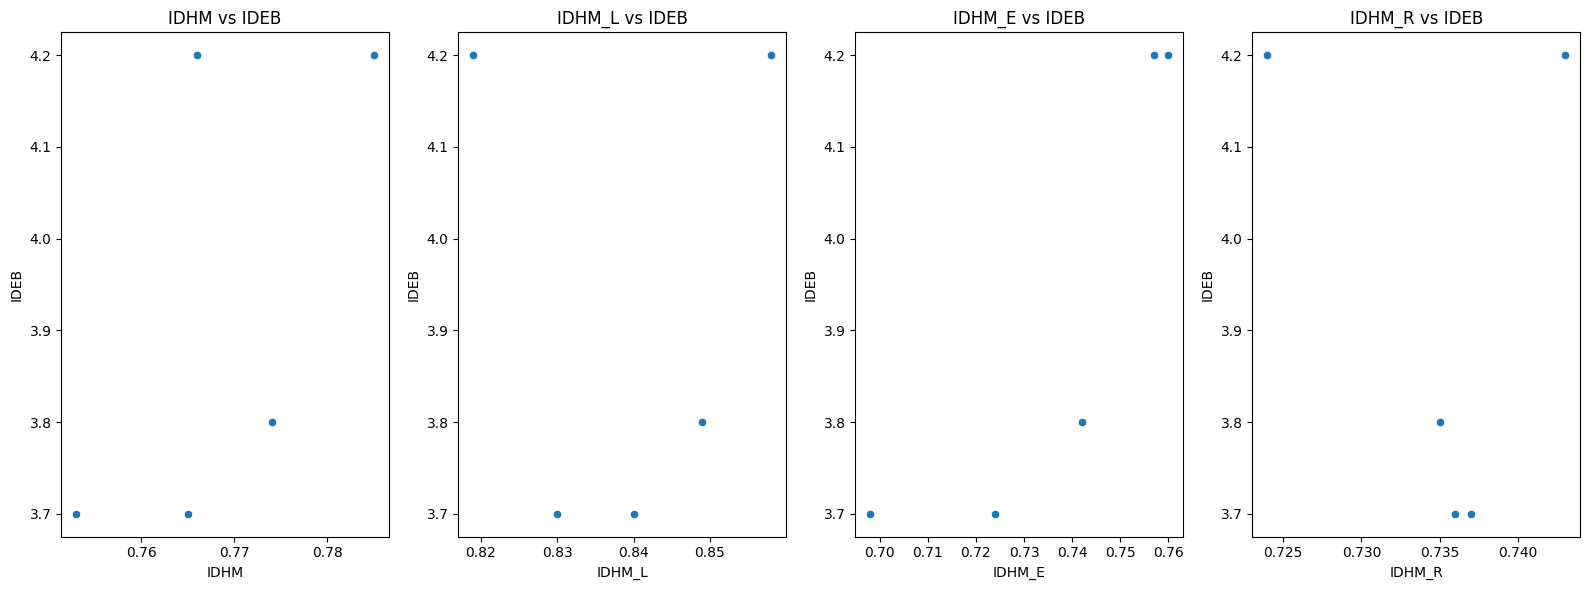

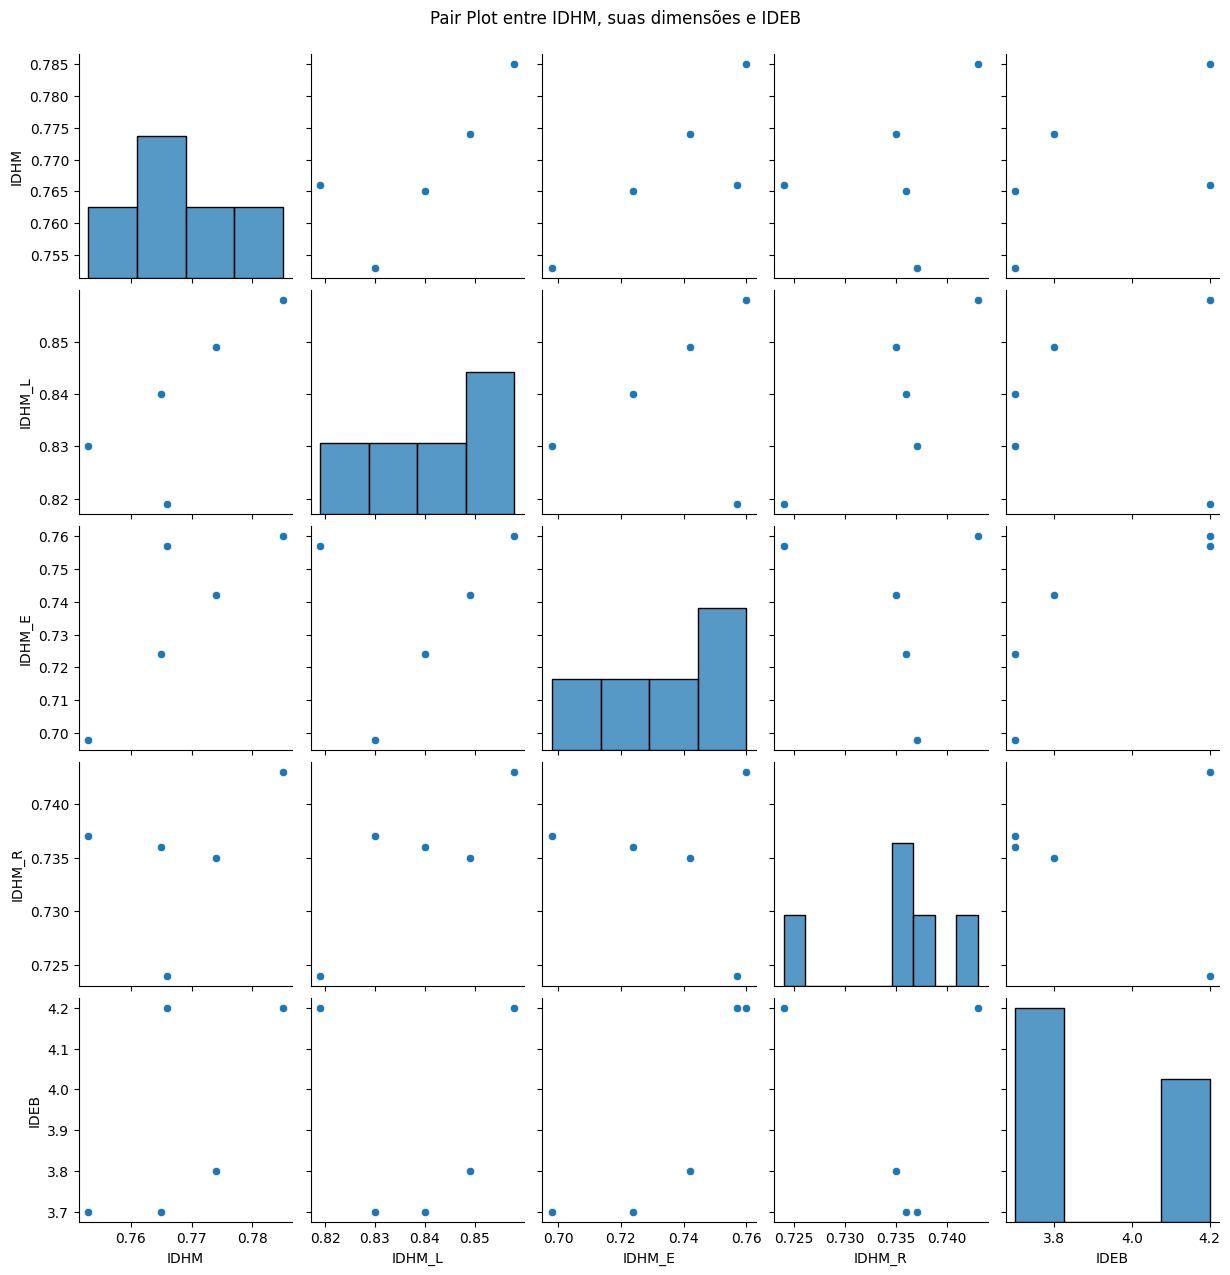

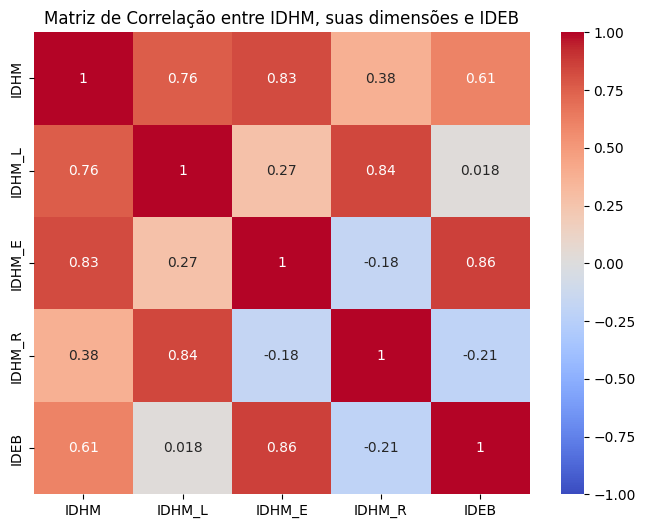

In [55]:
# 1. Scatterplot entre IDEB e cada dimensão do IDHM
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
sns.scatterplot(x='IDHM', y='IDEB', data=merged_df)
plt.title('IDHM vs IDEB')

plt.subplot(1, 4, 2)
sns.scatterplot(x='IDHM_L', y='IDEB', data=merged_df)
plt.title('IDHM_L vs IDEB')

plt.subplot(1, 4, 3)
sns.scatterplot(x='IDHM_E', y='IDEB', data=merged_df)
plt.title('IDHM_E vs IDEB')

plt.subplot(1, 4, 4)
sns.scatterplot(x='IDHM_R', y='IDEB', data=merged_df)
plt.title('IDHM_R vs IDEB')

plt.tight_layout()
plt.show()

# 2. Pair Plot (opcional, mas útil para ver todas as relações)
sns.pairplot(merged_df[['IDHM', 'IDHM_L', 'IDHM_E', 'IDHM_R', 'IDEB']])
plt.suptitle('Pair Plot entre IDHM, suas dimensões e IDEB', y=1.02)
plt.show()

# 3. Heatmap da Matriz de Correlação
correlation_matrix = merged_df[['IDHM', 'IDHM_L', 'IDHM_E', 'IDHM_R', 'IDEB']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre IDHM, suas dimensões e IDEB')
plt.show()





Análise Detalhada dos Gráficos
1.	Pair Plot:
o	O pair plot mostra as relações entre todas as combinações de pares de variáveis.
o	É possível observar que algumas variáveis do IDHM (principalmente IDHM_E) parecem ter uma relação positiva com o IDEB, mas as relações não são muito fortes.
o	A dispersão dos pontos sugere que outros fatores, além do IDHM, influenciam o IDEB.
2.	Scatterplots:
o	Os scatterplots individuais confirmam as observações do pair plot.
o	A relação entre IDHM e IDEB parece ser mais forte para o IDHM_E (IDHM Educação).
o	Há uma grande dispersão nos dados, indicando que a relação não é determinística.
3.	Heatmap da Matriz de Correlação:
o	O heatmap mostra os coeficientes de correlação entre as variáveis.
o	Os valores de correlação são relativamente baixos, indicando que não há uma forte relação linear entre as variáveis.
o	A maior correlação parece ser entre IDHM_E e IDEB, o que reforça a importância da educação no desenvolvimento do IDEB.



##Medidas de Associação

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols


# 1. Coeficiente de Correlação de Pearson
pearson_corr = merged_df[['IDHM', 'IDEB']].corr(method='pearson')
print("Coeficiente de Correlação de Pearson:\n", pearson_corr)

# 2. Coeficiente de Spearman
spearman_corr, _ = spearmanr(merged_df['IDHM'], merged_df['IDEB'])
print("\nCoeficiente de Correlação de Spearman:", spearman_corr)

# 3. Regressão Linear Simples e Coeficiente de Determinação R²
# Adicionando uma constante para o termo independente
merged_df['const'] = 1
# Ajustando o modelo de regressão
model = sm.OLS(merged_df['IDEB'], merged_df[['IDHM', 'const']]).fit()
# Imprimindo os resultados do modelo
print(model.summary())


Coeficiente de Correlação de Pearson:
           IDHM      IDEB
IDHM  1.000000  0.606662
IDEB  0.606662  1.000000

Coeficiente de Correlação de Spearman: 0.7905694150420948
                            OLS Regression Results                            
Dep. Variable:                   IDEB   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     1.747
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.278
Time:                        21:34:12   Log-Likelihood:                 1.3681
No. Observations:                   5   AIC:                             1.264
Df Residuals:                       3   BIC:                            0.4826
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err     

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


##REGRESSÃO

In [57]:
import pandas as pd
import statsmodels.api as sm

# Supondo que o merged_df já foi criado conforme os códigos anteriores

# Lista das dimensões do IDHM
idhm_dimensions = ['IDHM', 'IDHM_L', 'IDHM_E', 'IDHM_R']

# Loop para realizar a regressão linear para cada dimensão do IDHM
for dimension in idhm_dimensions:
    # Adiciona uma constante para o termo independente
    merged_df['const'] = 1
    # Ajusta o modelo de regressão
    model = sm.OLS(merged_df['IDEB'], merged_df[[dimension, 'const']]).fit()
    # Imprime os resultados do modelo
    print(f"Resultados da Regressão Linear para {dimension}:\n")
    print(model.summary())
    print("\n--------------------------------------------------\n")


Resultados da Regressão Linear para IDHM:

                            OLS Regression Results                            
Dep. Variable:                   IDEB   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     1.747
Date:                Sun, 09 Mar 2025   Prob (F-statistic):              0.278
Time:                        21:34:19   Log-Likelihood:                 1.3681
No. Observations:                   5   AIC:                             1.264
Df Residuals:                       3   BIC:                            0.4826
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IDHM     

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


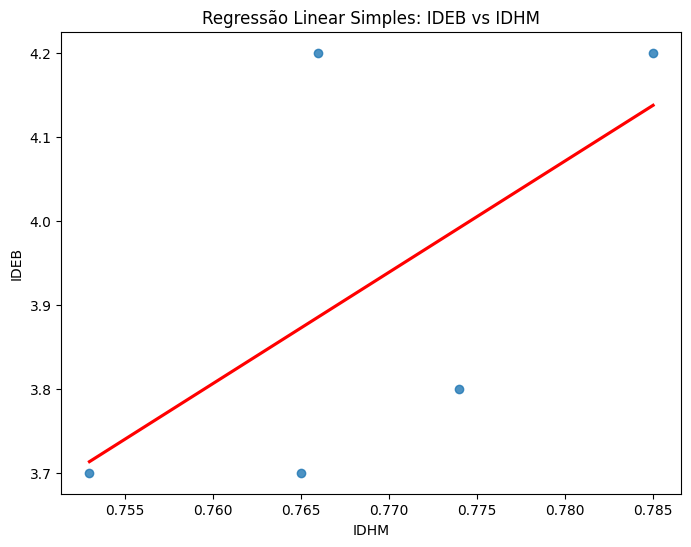

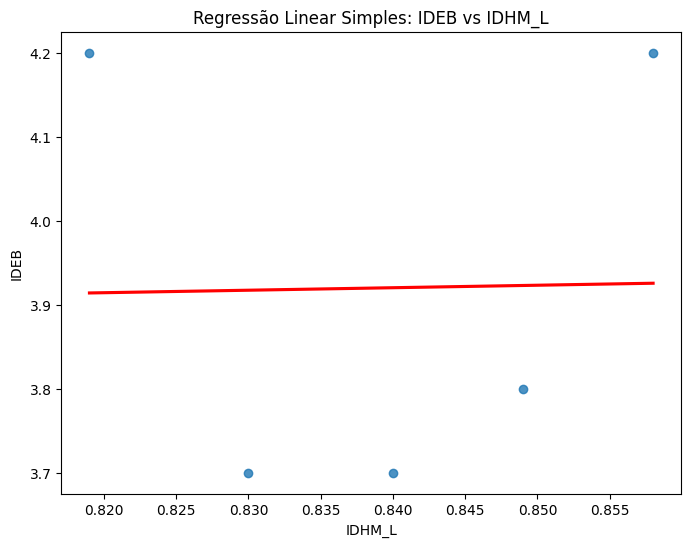

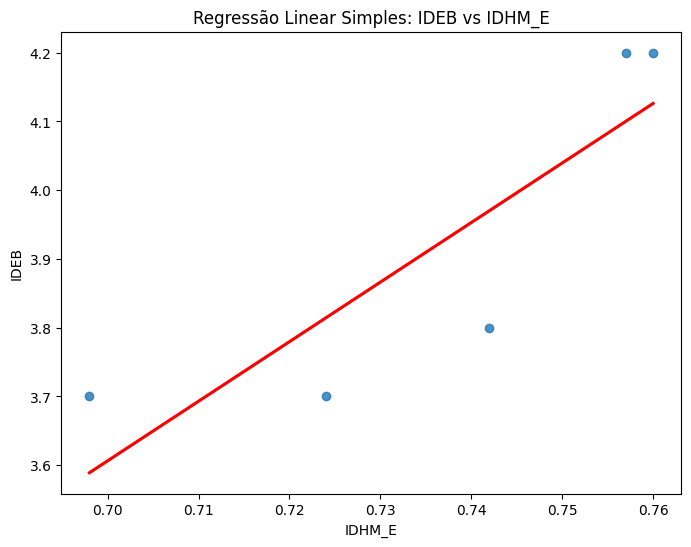

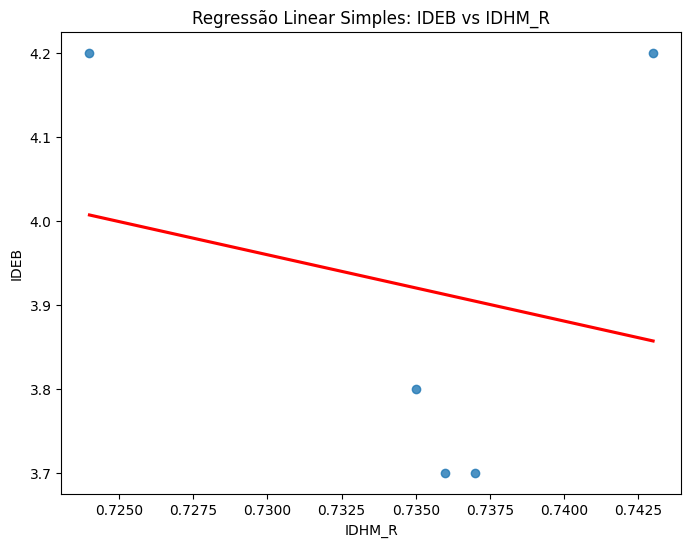

In [58]:
# prompt: Considerando que o dataframe merged_df foi realizado a partir do merged do datasets de IDHM e IDEB, suponho que esta etapa ja foi realizada, e considerando a regressão realizada no codigo, crie um codigo que  apresente a representação grafica da referida regressão

# Importa as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Supondo que 'merged_df' e o modelo de regressão 'model' já estejam definidos conforme o código anterior

# Crie o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(8, 6))
sns.regplot(x='IDHM', y='IDEB', data=merged_df, ci=None, line_kws={'color': 'red'}) # ci=None remove intervalos de confiança

# Adicione rótulos e título
plt.xlabel('IDHM')
plt.ylabel('IDEB')
plt.title('Regressão Linear Simples: IDEB vs IDHM')

# Exiba o gráfico
plt.show()


#Para as demais dimensões do IDHM:
idhm_dimensions = ['IDHM_L', 'IDHM_E', 'IDHM_R']

for dimension in idhm_dimensions:
  # Adiciona uma constante para o termo independente (se ainda não foi adicionado)
  if 'const' not in merged_df.columns:
      merged_df['const'] = 1
  # Ajusta o modelo de regressão para a dimensão atual
  model = sm.OLS(merged_df['IDEB'], merged_df[[dimension, 'const']]).fit()

  # Crie o gráfico de dispersão com a linha de regressão
  plt.figure(figsize=(8, 6))
  sns.regplot(x=dimension, y='IDEB', data=merged_df, ci=None, line_kws={'color': 'red'})

  # Adicione rótulos e título
  plt.xlabel(dimension)
  plt.ylabel('IDEB')
  plt.title(f'Regressão Linear Simples: IDEB vs {dimension}')

  # Exiba o gráfico
  plt.show()
